In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from labellines import labelLine, labelLines

def plot_from_csv(csv_file_path):
    # Simulation parameters (must match those used to generate F)
    Nx = 400    # resolution x-dir
    Ny = 100    # resolution y-dir
    NL = 9     # Number of Lattice directions
    cxs = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
    cys = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])

    # Read and reshape F from CSV
    F_flat = pd.read_csv(csv_file_path, header=None)[0].values
    F = F_flat.reshape((Ny, Nx, NL))

    # Cylinder boundary
    X, Y = np.meshgrid(range(Nx), range(Ny))
    cylinder = (X - Nx/4)**2 + (Y - Ny/2)**2 < (Ny/4)**2
    
    # Calculate fluid variables
    rho = np.sum(F, 2)
    ux = np.sum(F*cxs, 2) / rho
    uy = np.sum(F*cys, 2) / rho
    
    # Plotting
    plt.figure(figsize=(4,2), dpi=80)
    ux[cylinder] = 0
    uy[cylinder] = 0
    vorticity = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
    vorticity[cylinder] = np.nan
    vorticity = np.ma.array(vorticity, mask=cylinder)
    plt.imshow(vorticity, cmap='bwr')
    plt.imshow(~cylinder, cmap='gray', alpha=0.3)
    plt.clim(-.1, .1)
    ax = plt.gca()
    ax.invert_yaxis()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')
    
    # Show plot
    plt.show()

In [4]:
# plot_from_csv(csv_file_path)

In [31]:
def cost(flops, iops):
        return flops + 0.2*iops


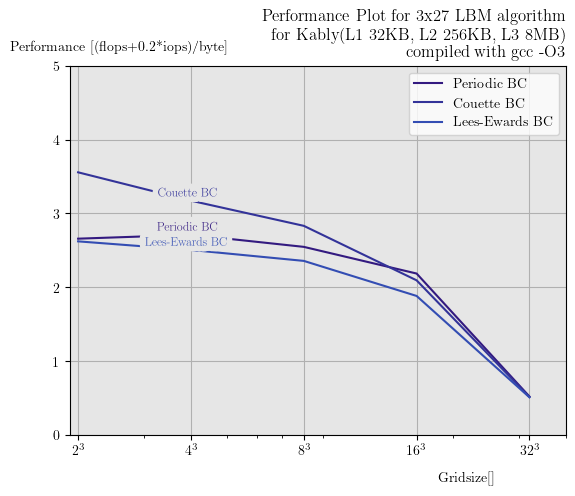

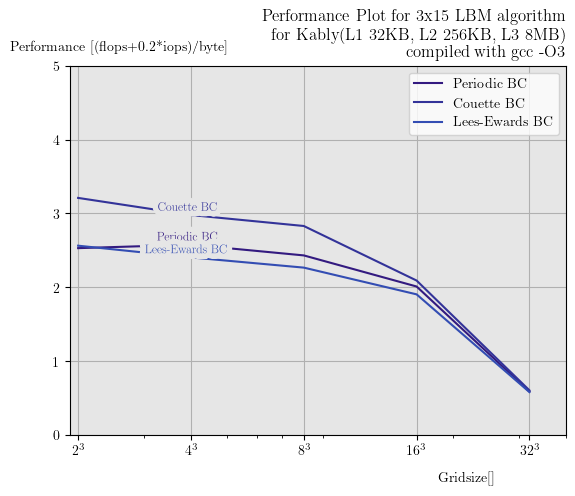

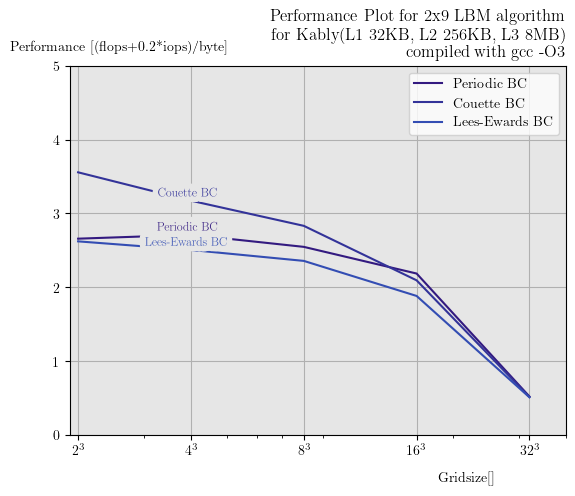

In [147]:

from matplotlib import rc


rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

def plotTime(df, title, i): 
    plt.figure(i)   
    ax = plt.gca()

    df1 = df.loc[(df["BOUNDARY_CONDITION"]==1)]
    df2 = df.loc[(df["BOUNDARY_CONDITION"]==2)]
    df3 = df.loc[(df["BOUNDARY_CONDITION"]==3)]
    xaxis = df1["NX"].values
    # plt.loglog()
    plt.semilogx()
    # xlog()
    plt.plot(xaxis, cost(df1["flops"], df1["iops"])/df1["cyclesStruct"], color=(0.2,0.1,0.5,1),label="Periodic BC")
    plt.plot(xaxis, cost(df2["flops"], df2["iops"])/df2["cyclesStruct"], color=(0.2,0.2,0.6,1),label="Couette BC")
    plt.plot(xaxis, cost(df3["flops"], df3["iops"])/df3["cyclesStruct"], color=(0.2,0.3,0.7,1),label="Lees-Ewards BC")



    plt.xlabel('Gridsize[]')
    plt.ylabel('Performance [(flops+0.2*iops)/byte]', rotation=0)

    ax.yaxis.set_label_coords(0.1, 1.03)
    ax.xaxis.set_label_coords(0.8, -0.1)

    x_ticks =  [2,4,8,16,32]
    x_ticksL = ["$2^3$","$4^3$","$8^3$","$16^3$","$32^3$"]
    # y_ticks = []

    xmin = 1.9
    xmax = 40
    ymin=0
    ymax=5
    plt.axis([xmin,xmax,ymin,ymax])

    ax.set_facecolor((0.9,0.9,0.9))


    lines = ax.get_lines()
    labelLine(lines[0], 4,   align=False,  fontsize=9, yoffset=0.1) 
    labelLine(lines[1], 4,   align=False,  fontsize=9, yoffset=0.1) 
    labelLine(lines[2], 4,   align=False,  fontsize=9, yoffset=0.1)

    plt.xticks(x_ticks, x_ticksL)
    plt.legend()
    plt.title(title, loc="right") #, x=0.85, y=0.9)
    plt.grid(True)
    plt.show



title27 = "Performance Plot for 3x27 LBM algorithm \n for KabyLake(L1 32KB, L2 256KB, L3 8MB) \n compiled with gcc -O3"

title15 = "Performance Plot for 3x15 LBM algorithm \n for KabyLake(L1 32KB, L2 256KB, L3 8MB) \n compiled with gcc -O3"

title9 = "Performance Plot for 2x9 LBM algorithm \n for KabyLake(L1 32KB, L2 256KB, L3 8MB) \n compiled with gcc -O3"


csv_file_path = "TimingData.csv"
df = pd.read_csv(csv_file_path)

df27 = df.loc[(df['DIRECTION_SIZE'] == 27)]
df15 = df.loc[(df['DIRECTION_SIZE'] == 15)]
df9 = df.loc[(df['DIRECTION_SIZE'] == 9)]

plotTime(df27, title27, 0)
plotTime(df15, title15, 1)
plotTime(df27, title9, 2)

CPUID code	0806e9h, 0806eah, 0906e9h
Product code	80677
Performance
Max. CPU clock rate	1.00 GHz to 4.5 GHz
Cache
L1 cache	64 KB[a] per core (32 KB instructions + 32 KB data)
L2 cache	256 KB per core
L3 cache	Up to 8 MB, share
L4 cache	64 MB of eDRAM (on models with Iris Plus graphics)

KABY LAKE

In [129]:
# plot(dfn[(df["BOUNDARY_CONDITION"])])
# df3 = dfn.loc[(df["BOUNDARY_CONDITION"]==1)]
# df3["NX"].values

TypeError: plotTime() missing 1 required positional argument: 'i'